In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df = pd.read_csv("./titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

### HANDLING MISSING VALUE

In [105]:
print(df.isnull().sum()) # shows the count of missing values in each colums

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [106]:
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24208\2401092982.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)


Here, We have handled missing Age using method of 'mean'.

In [107]:
# handling the column Embarked and Cabin.
df_mode = df

df_mode['Cabin'].fillna(df_mode['Cabin'].mode()[0], inplace=True)
df_mode.dropna(subset=['Embarked'], inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24208\3006390919.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Cabin'].fillna(df_mode['Cabin'].mode()[0], inplace=True)


Now, we have handled Embarked and Cabin by dropping rows with Embarked, and using mode for cabin column.


## Feature Scaling

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S


In [109]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'Fare', 'SibSp', 'Parch']  # choose what you use as features

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.590495,0.431350,-0.474326,A/5 21171,-0.500240,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.643971,0.431350,-0.474326,PC 17599,0.788947,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.281878,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.412509,0.431350,-0.474326,113803,0.422861,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0.412509,-0.475199,-0.474326,373450,-0.484133,B96 B98,S


We have scaled the features using standardization.

## Removing Outliers

Before Removing Outliers:


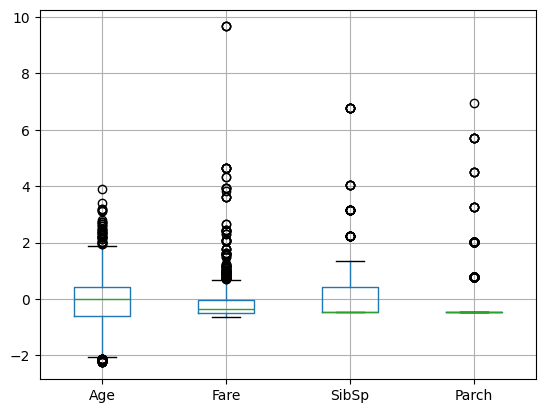

Age: Lower = -2.095, Upper = 1.917
Fare: Lower = -1.155, Upper = 0.626
SibSp: Lower = -1.835, Upper = 1.791
Parch: Lower = -0.474, Upper = -0.474
After Removing Outliers:


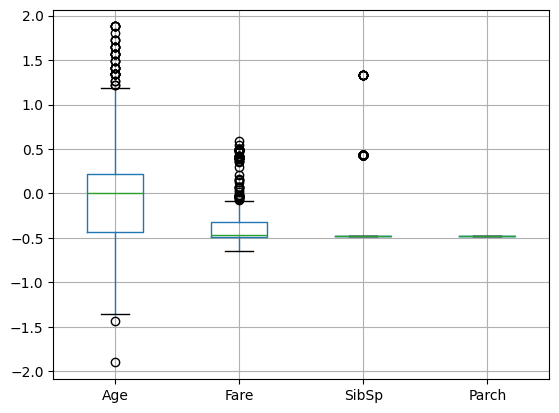

Original Shape: (889, 12)
After Removing Outliers: (577, 12)


In [110]:
# Use the dataframe after handling missing values
numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

def remove_outliers_iqr(data, columns):
    data_clean = data.copy()
    
    for col in columns:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        print(f"{col}: Lower = {lower:.3f}, Upper = {upper:.3f}")

        # Keep only non-outliers for this column
        data_clean = data_clean[(data_clean[col] >= lower) & (data_clean[col] <= upper)]
    
    return data_clean

print("Before Removing Outliers:")
df_mode[numeric_cols].boxplot()
plt.show()

df_clean = remove_outliers_iqr(df_mode, numeric_cols)

print("After Removing Outliers:")
df_clean[numeric_cols].boxplot()
plt.show()

print("Original Shape:", df_mode.shape)
print("After Removing Outliers:", df_clean.shape)



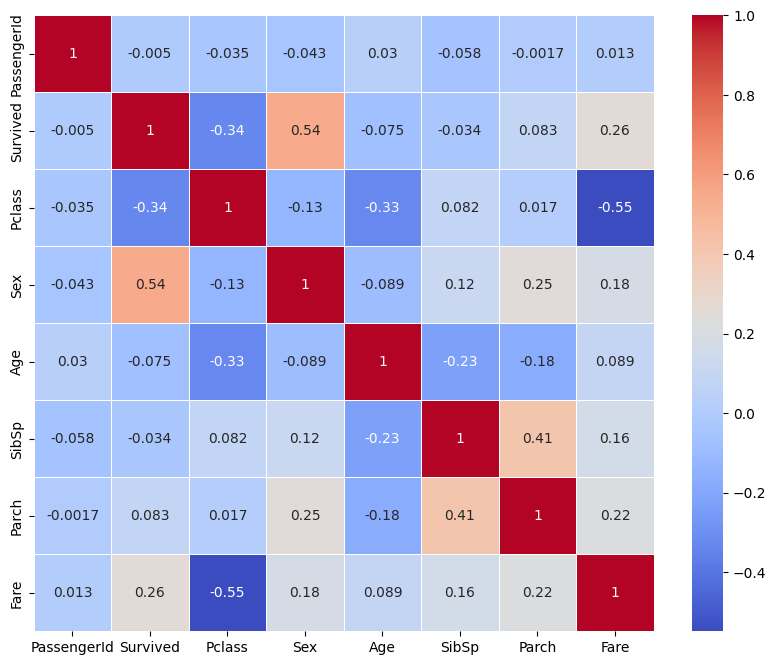

In [123]:
# not including the columns with strings.
titanic_new = df.drop(columns=['Name','Ticket','Cabin','Embarked']) 

corr_matrix = titanic_new.corr() # calculates the correlation matrix

plt.figure(figsize=(10, 8)) # plot the heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.4)
plt.show()



In [124]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.590495,0.431350,-0.474326,A/5 21171,-0.500240,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.643971,0.431350,-0.474326,PC 17599,0.788947,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.281878,-0.475199,-0.474326,STON/O2. 3101282,-0.486650,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.412509,0.431350,-0.474326,113803,0.422861,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0.412509,-0.475199,-0.474326,373450,-0.484133,B96 B98,S
